# Data Cleaning and Transformation


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm, feature_selection, linear_model, metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

## Load data into Dataframe and Return Shape


In [2]:
data = pd.read_csv("diabetic_data.csv")

data.shape #(101766, 50)


(101766, 50)

## Replace ? values with numpy.nan


In [3]:
filtered_data = data.replace('?', np.nan)
filtered_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
#Investigate rows with any missing values
print("Any Null values?: ", filtered_data.isnull().values.any())
print("Count of Rows with any Null Values: ", sum([True for idx,row in filtered_data.iterrows() if any(row.isnull())]),"missing out of", data.shape[0])
#100723 out of 101766

Any Null values?:  True
Count of Rows with any Null Values:  101766 missing out of 101766


In [5]:
print(filtered_data.columns[filtered_data.isnull().mean() > 0.5]) 
## investigation shows that weight column is the only one dropped.

Index(['weight', 'max_glu_serum', 'A1Cresult'], dtype='object')


## Drop all columns that have more than 50% of missing values.


In [6]:

# filtered_data = filtered_data[filtered_data.columns[filtered_data.isnull().mean() < 0.5]]

## Alternatively use dropna to remove columns with null values over 50%.
min_count =  int(((100-50)/100)*filtered_data.shape[0] + 1)
filtered_data.dropna(axis='columns', thresh=min_count,inplace=True)

filtered_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,MC,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,MC,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO


## drop columns for which over 95% of their values are the same


In [7]:


#take most common occurring unique value. if that occurs 95% of the time, drop.
nunique = filtered_data.nunique() # number of unique data points
thresh = int(101766 *0.95)

filtered_data_copy = filtered_data
for column in filtered_data_copy:
    column_mode = filtered_data_copy[column].mode()
    column_count = filtered_data_copy[column].value_counts().max()
    print(column_mode.head(1))
    print("Count: ", column_count, "\n")
    if column_count >= thresh:
        filtered_data_copy.drop(column, axis=1, inplace=True)

filtered_data_copy.shape



0    12522
Name: encounter_id, dtype: int64
Count:  1 

0    88785891
Name: patient_nbr, dtype: int64
Count:  40 

0    Caucasian
Name: race, dtype: object
Count:  76099 

0    Female
Name: gender, dtype: object
Count:  54708 

0    [70-80)
Name: age, dtype: object
Count:  26068 

0    1
Name: admission_type_id, dtype: int64
Count:  53990 

0    1
Name: discharge_disposition_id, dtype: int64
Count:  60234 

0    7
Name: admission_source_id, dtype: int64
Count:  57494 

0    3
Name: time_in_hospital, dtype: int64
Count:  17756 

0    MC
Name: payer_code, dtype: object
Count:  32439 

0    InternalMedicine
Name: medical_specialty, dtype: object
Count:  14635 

0    1
Name: num_lab_procedures, dtype: int64
Count:  3208 

0    0
Name: num_procedures, dtype: int64
Count:  46652 

0    13
Name: num_medications, dtype: int64
Count:  6086 

0    0
Name: number_outpatient, dtype: int64
Count:  85027 

0    0
Name: number_emergency, dtype: int64
Count:  90383 

0    0
Name: number_inpatient, dty

(101766, 31)

In [8]:
filtered_data_copy

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,MC,...,No,No,No,No,No,No,Steady,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,MC,...,No,No,Steady,No,Steady,No,Up,Ch,Yes,NO


In [9]:
filtered_data = filtered_data_copy
filtered_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,MC,...,No,No,No,No,No,No,Steady,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,MC,...,No,No,Steady,No,Steady,No,Up,Ch,Yes,NO


## Transform age to middle value


In [10]:
#getting rid of brackets
filtered_data["age"] = filtered_data["age"].str.strip("[)")
#not working as intended I think we have to use regex

filtered_data["age"] = filtered_data["age"].str.replace("-", " ", regex=True)

#turning into a list
filtered_data["age"] =  filtered_data["age"].str.split()

#this doesnt work
#filtered_data["age"] = re.sub("-"," ",filtered_data["age"])
filtered_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,"[0, 10]",6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,"[10, 20]",1,1,7,3,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,"[20, 30]",1,1,7,2,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,"[30, 40]",1,1,7,2,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,"[40, 50]",1,1,7,1,NaN,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,"[70, 80]",1,3,7,3,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,"[80, 90]",1,4,5,5,MC,...,No,No,No,No,No,No,Steady,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,"[70, 80]",1,1,7,1,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,"[80, 90]",2,3,7,10,MC,...,No,No,Steady,No,Steady,No,Up,Ch,Yes,NO


In [11]:
#for each index for each list element in the age column - make it an integer
filtered_data["age"] =  filtered_data["age"].apply(lambda x: [int(i) for i in x])

filtered_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,"[0, 10]",6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,"[10, 20]",1,1,7,3,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,"[20, 30]",1,1,7,2,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,"[30, 40]",1,1,7,2,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,"[40, 50]",1,1,7,1,NaN,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,"[70, 80]",1,3,7,3,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,"[80, 90]",1,4,5,5,MC,...,No,No,No,No,No,No,Steady,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,"[70, 80]",1,1,7,1,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,"[80, 90]",2,3,7,10,MC,...,No,No,Steady,No,Steady,No,Up,Ch,Yes,NO


In [12]:
#didnt work because apply needs to be used with a function
#filtered_data["mean_age"] = filtered_data["age"].apply(np.mean)


def mean_calc(row):
    #if you dont return a value it will crash
    return np.mean(row)



filtered_data["age"] = filtered_data["age"].apply(mean_calc)

filtered_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5.0,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15.0,1,1,7,3,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25.0,1,1,7,2,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35.0,1,1,7,2,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45.0,1,1,7,1,NaN,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,75.0,1,3,7,3,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,85.0,1,4,5,5,MC,...,No,No,No,No,No,No,Steady,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,75.0,1,1,7,1,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,85.0,2,3,7,10,MC,...,No,No,Steady,No,Steady,No,Up,Ch,Yes,NO


## Replacing possible missing values in column diag1, diag2 and diag3 by 0


In [13]:

replace_col = ['diag_1', 'diag_2', 'diag_3']
filtered_data[replace_col] = filtered_data[replace_col].fillna(0)
filtered_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5.0,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15.0,1,1,7,3,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25.0,1,1,7,2,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35.0,1,1,7,2,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45.0,1,1,7,1,NaN,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,75.0,1,3,7,3,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,85.0,1,4,5,5,MC,...,No,No,No,No,No,No,Steady,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,75.0,1,1,7,1,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,85.0,2,3,7,10,MC,...,No,No,Steady,No,Steady,No,Up,Ch,Yes,NO


## Drop all rows with missing values.


In [14]:
# pre-modification checks
print(filtered_data.isnull().sum(), filtered_data.shape)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
metformin                       0
glimepiride                     0
glipizide                       0
glyburide                       0
pioglitazone                    0
rosiglitazone                   0
insulin                         0
change                          0
diabetesMed   

In [15]:

filtered_data = filtered_data.dropna()
print(filtered_data.isnull().sum() , filtered_data.shape)

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
glimepiride                 0
glipizide                   0
glyburide                   0
pioglitazone                0
rosiglitazone               0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64 (27140, 31)


In [16]:
filtered_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
20446,72091308,20123568,Caucasian,Female,75.0,1,22,7,7,MC,...,No,No,No,No,Up,No,Steady,Ch,Yes,NO
20737,72848634,20377854,Caucasian,Female,65.0,2,1,1,3,MC,...,No,No,No,No,No,No,Steady,No,Yes,NO
20824,73062156,20408121,Caucasian,Female,95.0,1,1,7,4,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO
21083,73731852,20542797,Caucasian,Male,75.0,1,2,7,10,MC,...,Steady,No,No,No,No,No,Steady,Ch,Yes,NO
23879,81355914,7239654,Caucasian,Female,75.0,1,3,6,12,UN,...,No,No,No,No,No,No,Steady,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,443739044,106595208,Caucasian,Male,75.0,2,6,7,6,MC,...,No,No,No,No,No,No,Up,Ch,Yes,NO
101743,443793668,47293812,Caucasian,Male,85.0,1,13,7,3,MC,...,No,No,No,Up,No,Steady,Down,Ch,Yes,NO
101747,443804570,33230016,Caucasian,Female,75.0,1,22,7,8,MC,...,No,No,No,No,No,No,Steady,No,Yes,>30
101749,443816024,106392411,Caucasian,Female,75.0,3,6,1,3,MC,...,Steady,No,Steady,No,No,No,Steady,Ch,Yes,NO


## Form a list of numerical features and one for categorical features


In [17]:
#Identify all numerical features and form a list of numerical features and another for the remaining categorical features.


#filtered by numerical features and categorical features
num_col = filtered_data.select_dtypes(include=[np.number]).copy()
cat_col = filtered_data.select_dtypes(include=[object]).copy()

num_col



,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
20446,72091308,20123568,75.0,1,22,7,7,58,2,15,0,0,0,9
20737,72848634,20377854,65.0,2,1,1,3,59,3,11,0,0,0,6
20824,73062156,20408121,95.0,1,1,7,4,56,1,9,0,0,0,6
21083,73731852,20542797,75.0,1,2,7,10,68,1,18,0,0,0,6
23879,81355914,7239654,75.0,1,3,6,12,77,5,19,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,443739044,106595208,75.0,2,6,7,6,46,5,14,0,0,1,9
101743,443793668,47293812,85.0,1,13,7,3,45,0,26,1,0,1,9
101747,443804570,33230016,75.0,1,22,7,8,51,6,19,0,0,0,9
101749,443816024,106392411,75.0,3,6,1,3,27,1,29,0,1,0,9


In [18]:
cat_col

,race,gender,payer_code,medical_specialty,diag_1,diag_2,diag_3,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
20446,Caucasian,Female,MC,Orthopedics-Reconstructive,821,276,285,No,No,No,No,Up,No,Steady,Ch,Yes,NO
20737,Caucasian,Female,MC,Nephrology,V56,403,599,No,No,No,No,No,No,Steady,No,Yes,NO
20824,Caucasian,Female,MC,Emergency/Trauma,532,428,535,No,Steady,No,No,No,No,No,No,Yes,NO
21083,Caucasian,Male,MC,InternalMedicine,682,427,276,Steady,No,No,No,No,No,Steady,Ch,Yes,NO
23879,Caucasian,Female,UN,InternalMedicine,238,250.02,733,No,No,No,No,No,No,Steady,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,Caucasian,Male,MC,Emergency/Trauma,575,577,250,No,No,No,No,No,No,Up,Ch,Yes,NO
101743,Caucasian,Male,MC,Emergency/Trauma,486,276,428,No,No,No,Up,No,Steady,Down,Ch,Yes,NO
101747,Caucasian,Female,MC,InternalMedicine,410,311,250,No,No,No,No,No,No,Steady,No,Yes,>30
101749,Caucasian,Female,MC,Orthopedics,715,401,250,Steady,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [19]:
filtered_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
20446,72091308,20123568,Caucasian,Female,75.0,1,22,7,7,MC,...,No,No,No,No,Up,No,Steady,Ch,Yes,NO
20737,72848634,20377854,Caucasian,Female,65.0,2,1,1,3,MC,...,No,No,No,No,No,No,Steady,No,Yes,NO
20824,73062156,20408121,Caucasian,Female,95.0,1,1,7,4,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO
21083,73731852,20542797,Caucasian,Male,75.0,1,2,7,10,MC,...,Steady,No,No,No,No,No,Steady,Ch,Yes,NO
23879,81355914,7239654,Caucasian,Female,75.0,1,3,6,12,UN,...,No,No,No,No,No,No,Steady,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,443739044,106595208,Caucasian,Male,75.0,2,6,7,6,MC,...,No,No,No,No,No,No,Up,Ch,Yes,NO
101743,443793668,47293812,Caucasian,Male,85.0,1,13,7,3,MC,...,No,No,No,Up,No,Steady,Down,Ch,Yes,NO
101747,443804570,33230016,Caucasian,Female,75.0,1,22,7,8,MC,...,No,No,No,No,No,No,Steady,No,Yes,>30
101749,443816024,106392411,Caucasian,Female,75.0,3,6,1,3,MC,...,Steady,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [20]:
#Identify outliers in the numerical columns and remove them. To keep it simple, you may decide to only
#keep values that are within 3 standard deviations away from the mean for each feature of the dataset.
#fining the z_score for each column and keeping all below score of 3

cleaned_data = pd.DataFrame()

for col in num_col:
    z_score = np.abs((filtered_data[col] - filtered_data[col].mean()) / filtered_data[col].std())
    #keeping all columns with a lower z_score of 3 
    cleaned_col = filtered_data[col][(z_score < 3)]
    cleaned_data[col] = cleaned_col

cleaned_data.shape

(27016, 14)

In [21]:
#Remove duplicates in the column patient_nbr and show the shape of the resulting dataframe.

cleaned_data.drop_duplicates(subset='patient_nbr', inplace= True)

cleaned_data

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
20446,72091308,20123568.0,75.0,1.0,NaN,7.0,7.0,58.0,2,15.0,0.0,0.0,0.0,9.0
20737,72848634,20377854.0,65.0,2.0,1.0,1.0,3.0,59.0,3,11.0,0.0,0.0,0.0,6.0
20824,73062156,20408121.0,95.0,1.0,1.0,7.0,4.0,56.0,1,9.0,0.0,0.0,0.0,6.0
21083,73731852,20542797.0,75.0,1.0,2.0,7.0,10.0,68.0,1,18.0,0.0,0.0,0.0,6.0
23879,81355914,7239654.0,75.0,1.0,3.0,6.0,12.0,77.0,5,19.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101249,436785812,87833862.0,75.0,2.0,3.0,1.0,10.0,59.0,1,19.0,0.0,0.0,0.0,9.0
101268,437270768,124367945.0,65.0,1.0,1.0,7.0,2.0,53.0,6,19.0,0.0,0.0,0.0,9.0
101278,437309498,52653654.0,65.0,1.0,1.0,7.0,7.0,54.0,4,14.0,1.0,0.0,0.0,2.0
101284,437331638,142026269.0,85.0,2.0,1.0,4.0,3.0,1.0,0,15.0,0.0,0.0,1.0,9.0


In [22]:
#adding back in catergorical columns
for col in cat_col:
    cleaned_data[col] = filtered_data[col]
cleaned_data

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
20446,72091308,20123568.0,75.0,1.0,NaN,7.0,7.0,58.0,2,15.0,...,No,No,No,No,Up,No,Steady,Ch,Yes,NO
20737,72848634,20377854.0,65.0,2.0,1.0,1.0,3.0,59.0,3,11.0,...,No,No,No,No,No,No,Steady,No,Yes,NO
20824,73062156,20408121.0,95.0,1.0,1.0,7.0,4.0,56.0,1,9.0,...,No,Steady,No,No,No,No,No,No,Yes,NO
21083,73731852,20542797.0,75.0,1.0,2.0,7.0,10.0,68.0,1,18.0,...,Steady,No,No,No,No,No,Steady,Ch,Yes,NO
23879,81355914,7239654.0,75.0,1.0,3.0,6.0,12.0,77.0,5,19.0,...,No,No,No,No,No,No,Steady,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101249,436785812,87833862.0,75.0,2.0,3.0,1.0,10.0,59.0,1,19.0,...,No,No,No,No,No,No,Down,Ch,Yes,NO
101268,437270768,124367945.0,65.0,1.0,1.0,7.0,2.0,53.0,6,19.0,...,Steady,No,No,No,No,No,Up,Ch,Yes,NO
101278,437309498,52653654.0,65.0,1.0,1.0,7.0,7.0,54.0,4,14.0,...,Steady,No,No,No,No,No,No,No,Yes,NO
101284,437331638,142026269.0,85.0,2.0,1.0,4.0,3.0,1.0,0,15.0,...,Steady,No,No,No,Steady,No,Up,Ch,Yes,NO


In [23]:
model_df = cleaned_data[['num_medications', 'number_outpatient', 'number_emergency', 'time_in_hospital', 'number_inpatient', 'encounter_id', 'age', 'num_lab_procedures', 'number_diagnoses','num_procedures', 'readmitted']]
model_df

,num_medications,number_outpatient,number_emergency,time_in_hospital,number_inpatient,encounter_id,age,num_lab_procedures,number_diagnoses,num_procedures,readmitted
20446,15.0,0.0,0.0,7.0,0.0,72091308,75.0,58.0,9.0,2,NO
20737,11.0,0.0,0.0,3.0,0.0,72848634,65.0,59.0,6.0,3,NO
20824,9.0,0.0,0.0,4.0,0.0,73062156,95.0,56.0,6.0,1,NO
21083,18.0,0.0,0.0,10.0,0.0,73731852,75.0,68.0,6.0,1,NO
23879,19.0,0.0,0.0,12.0,0.0,81355914,75.0,77.0,5.0,5,NO
...,...,...,...,...,...,...,...,...,...,...,...
101249,19.0,0.0,0.0,10.0,0.0,436785812,75.0,59.0,9.0,1,NO
101268,19.0,0.0,0.0,2.0,0.0,437270768,65.0,53.0,9.0,6,NO
101278,14.0,1.0,0.0,7.0,0.0,437309498,65.0,54.0,2.0,4,NO
101284,15.0,0.0,0.0,3.0,1.0,437331638,85.0,1.0,9.0,0,NO


In [24]:
# Investigating classification of re-admission. 3 options: ['<30', '>30', 'NO']
print(model_df.groupby('readmitted').groups.keys())

dict_keys(['<30', '>30', 'NO'])


In [25]:
print(model_df.isnull().sum())


num_medications       313
number_outpatient     356
number_emergency       46
time_in_hospital      150
number_inpatient       80
encounter_id            0
age                    84
num_lab_procedures     10
number_diagnoses       30
num_procedures          0
readmitted              0
dtype: int64


In [26]:
# Dropped all rows containing null values
model_df = model_df.dropna()
model_df

,num_medications,number_outpatient,number_emergency,time_in_hospital,number_inpatient,encounter_id,age,num_lab_procedures,number_diagnoses,num_procedures,readmitted
20446,15.0,0.0,0.0,7.0,0.0,72091308,75.0,58.0,9.0,2,NO
20737,11.0,0.0,0.0,3.0,0.0,72848634,65.0,59.0,6.0,3,NO
20824,9.0,0.0,0.0,4.0,0.0,73062156,95.0,56.0,6.0,1,NO
21083,18.0,0.0,0.0,10.0,0.0,73731852,75.0,68.0,6.0,1,NO
23879,19.0,0.0,0.0,12.0,0.0,81355914,75.0,77.0,5.0,5,NO
...,...,...,...,...,...,...,...,...,...,...,...
101249,19.0,0.0,0.0,10.0,0.0,436785812,75.0,59.0,9.0,1,NO
101268,19.0,0.0,0.0,2.0,0.0,437270768,65.0,53.0,9.0,6,NO
101278,14.0,1.0,0.0,7.0,0.0,437309498,65.0,54.0,2.0,4,NO
101284,15.0,0.0,0.0,3.0,1.0,437331638,85.0,1.0,9.0,0,NO


In [27]:
# Convert re-admitted column into 1 if sucessful, 0 if not re-admitted.

model_df['readmitted'] = model_df['readmitted'].replace(['NO', '>30', '<30'], ['0', '1', '1'])

#SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
#Try using .loc[row_indexer,col_indexer] = value instead
#used loc instead to make sure things went smoothly

#model_df.loc[:, 'readmitted'] = model_df['readmitted'].replace(['NO', '>30', '<30'], ['0', '1', '1'])


C:\Users\cassa\AppData\Local\Temp\ipykernel_9636\2943993412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['readmitted'] = model_df['readmitted'].replace(['NO', '>30', '<30'], ['0', '1', '1'])


Relationship between readmission to certain aspects


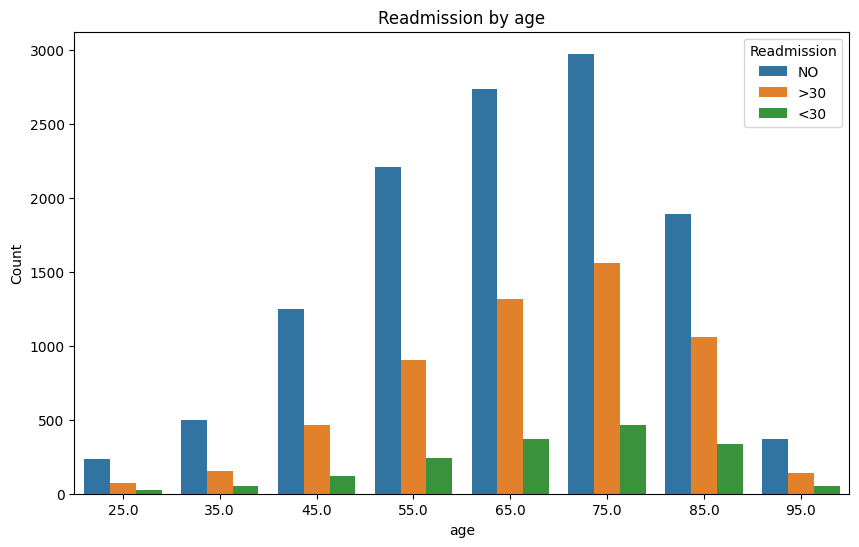

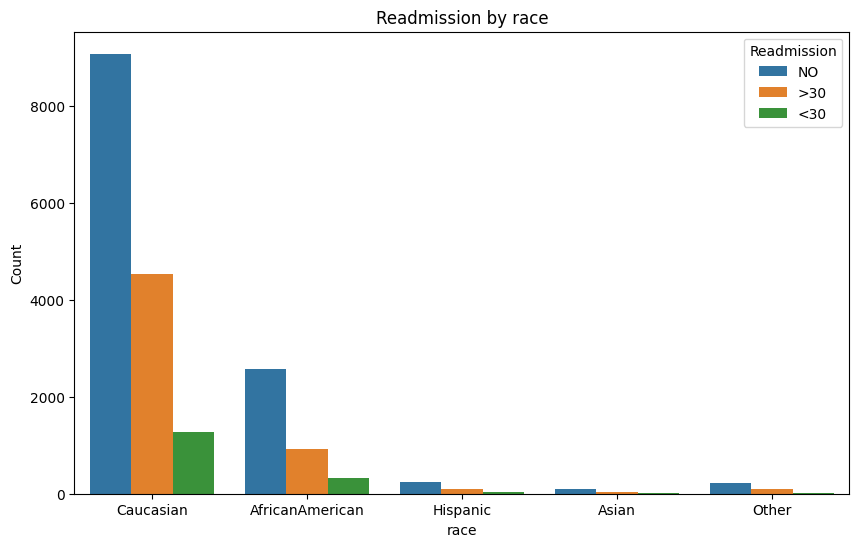

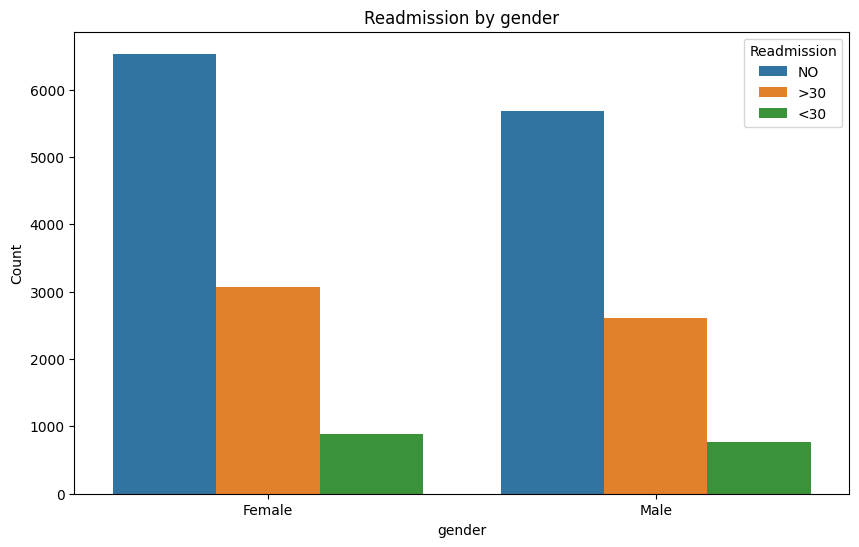

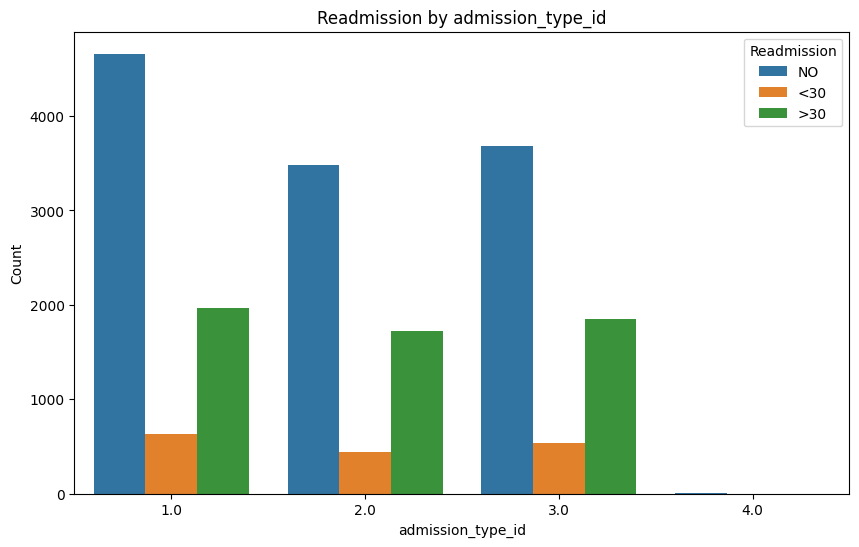

In [28]:
#Relationship between age and readmission

import matplotlib.pyplot as plt
import seaborn as sns

plot_cols2 = ["age","race", "gender", "admission_type_id"]

## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):

    import matplotlib.pyplot as plt
    import seaborn as sns

    for col in plot_cols:
        plt.figure(figsize=(10, 6))
        sns.countplot( x= col, hue=grid_col, data=df)
        plt.title('Readmission by ' + col)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend(title='Readmission', loc='upper right')
        plt.show()

cond_hists(cleaned_data, plot_cols2, 'readmitted')


In [29]:
race_readmission_counts = cleaned_data.groupby(['gender', 'readmitted']).size().unstack(fill_value=0)
print(race_readmission_counts)

readmitted  <30   >30    NO
gender                     
Female      894  3073  6533
Male        767  2613  5678


Relationship between diagnosis and readmission


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the datasets
diabetic_data_path = 'diabetic_data.csv'
icd_codes_path = 'icd_codes.csv'

diabetic_data = pd.read_csv(diabetic_data_path)
icd_codes = pd.read_csv(icd_codes_path)

# Convert the diagnosis codes in the diabetic data to strings to match the ICD codes
diabetic_data['diag_1'] = diabetic_data['diag_1'].astype(str)
diabetic_data['diag_2'] = diabetic_data['diag_2'].astype(str)
diabetic_data['diag_3'] = diabetic_data['diag_3'].astype(str)

# Since we do not have information on the format of the 'readmitted' column, let's inspect it to understand its structure.
readmitted_values = diabetic_data['readmitted'].unique()

# Merge the diabetic_data with the icd_codes for 'diag_1'
# Assuming the ICD codes are properly formatted and do not require cleaning for the join to work
# Create a dictionary from icd_codes dataframe to facilitate mapping
icd_code_dict = icd_codes.set_index('ICD_Code')['Description'].to_dict()

# Mapping the diagnosis codes to descriptions
diabetic_data['diag_1_desc'] = diabetic_data['diag_1'].map(icd_code_dict)
diabetic_data['diag_2_desc'] = diabetic_data['diag_2'].map(icd_code_dict)
diabetic_data['diag_3_desc'] = diabetic_data['diag_3'].map(icd_code_dict)

# Now let's see the unique values of the 'readmitted' column and the head of the merged data.
(diabetic_data.head(), readmitted_values)


(   encounter_id  patient_nbr             race  gender      age weight  \
 0       2278392      8222157        Caucasian  Female   [0-10)      ?   
 1        149190     55629189        Caucasian  Female  [10-20)      ?   
 2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
 3        500364     82442376        Caucasian    Male  [30-40)      ?   
 4         16680     42519267        Caucasian    Male  [40-50)      ?   
 
    admission_type_id  discharge_disposition_id  admission_source_id  \
 0                  6                        25                    1   
 1                  1                         1                    7   
 2                  1                         1                    7   
 3                  1                         1                    7   
 4                  1                         1                    7   
 
    time_in_hospital  ... glipizide-metformin glimepiride-pioglitazone  \
 0                 1  ...                  No 

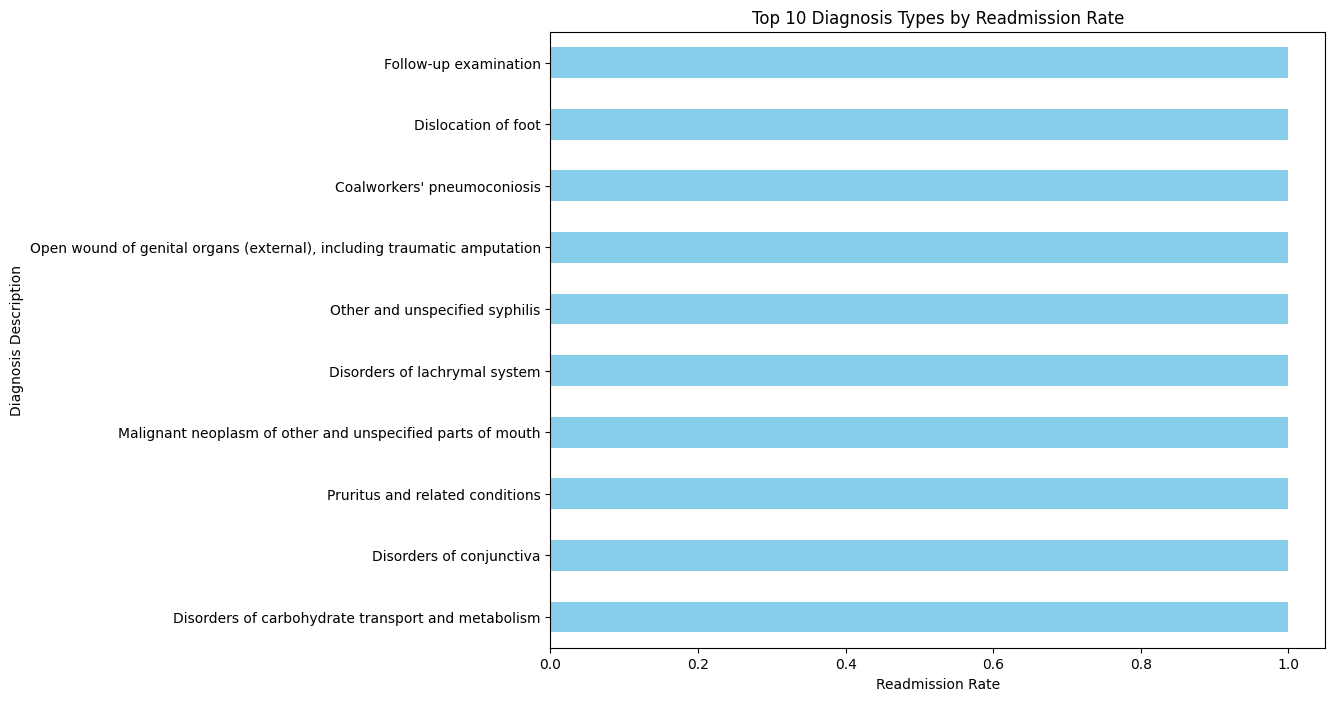

diag_1_desc
Follow-up examination                                                      1.0
Dislocation of foot                                                        1.0
Coalworkers' pneumoconiosis                                                1.0
Open wound of genital organs (external), including traumatic amputation    1.0
Other and unspecified syphilis                                             1.0
Disorders of lachrymal system                                              1.0
Malignant neoplasm of other and unspecified parts of mouth                 1.0
Pruritus and related conditions                                            1.0
Disorders of conjunctiva                                                   1.0
Disorders of carbohydrate transport and metabolism                         1.0
Name: readmitted, dtype: float64

In [31]:
# Convert the 'readmitted' column to a binary variable
# 0 for 'NO', 1 for '>30' and '<30'
diabetic_data['readmitted'] = diabetic_data['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

# Now we'll calculate the readmission rate for each 'diag_1' description
readmit_rate_by_diag1 = diabetic_data.groupby('diag_1_desc')['readmitted'].mean().sort_values(ascending=False)

# Select the top 10 diagnoses by readmission rate for plotting
top_10_diag1_readmit_rate = readmit_rate_by_diag1.head(10)

# Plotting the top 10 diagnoses
plt.figure(figsize=(10, 8))
top_10_diag1_readmit_rate.plot(kind='barh', color='skyblue')
plt.xlabel('Readmission Rate')
plt.ylabel('Diagnosis Description')
plt.title('Top 10 Diagnosis Types by Readmission Rate')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rate at the top
plt.show()

# Output the readmission rates for the top 10 diagnoses for reference
top_10_diag1_readmit_rate


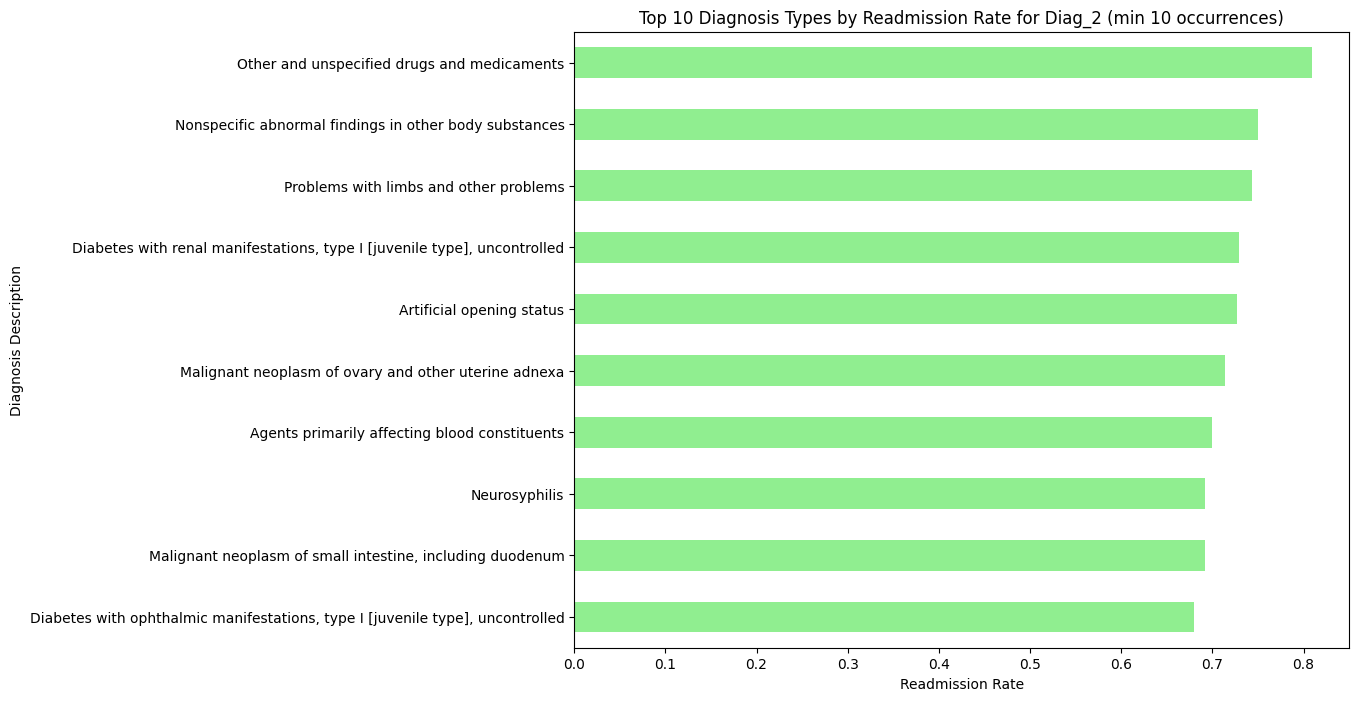

,mean,count
diag_2_desc,,
Other and unspecified drugs and medicaments,0.809524,21
Nonspecific abnormal findings in other body substances,0.750000,12
Problems with limbs and other problems,0.743590,39
"Diabetes with renal manifestations, type I [juvenile type], uncontrolled",0.729730,37
Artificial opening status,0.727273,11
Malignant neoplasm of ovary and other uterine adnexa,0.714286,14
Agents primarily affecting blood constituents,0.700000,10
Neurosyphilis,0.692308,26
"Malignant neoplasm of small intestine, including duodenum",0.692308,13


In [32]:
# Filter diag_2 descriptions with at least 10 occurrences
diag_2_counts = diabetic_data['diag_2_desc'].value_counts()
filtered_diag_2_desc = diag_2_counts[diag_2_counts >= 10].index.tolist()
filtered_diag_2_data = diabetic_data[diabetic_data['diag_2_desc'].isin(filtered_diag_2_desc)]
readmit_rate_by_filtered_diag2 = filtered_diag_2_data.groupby('diag_2_desc')['readmitted'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)


# Plot for diag_2
plt.figure(figsize=(10, 8))
(readmit_rate_by_filtered_diag2.head(10)['mean']).plot(kind='barh', color='lightgreen')
plt.xlabel('Readmission Rate')
plt.ylabel('Diagnosis Description')
plt.title('Top 10 Diagnosis Types by Readmission Rate for Diag_2 (min 10 occurrences)')
plt.gca().invert_yaxis()
plt.show()



# Returning the tables for the top 10 diagnosis types after filtering for diag_2
top_10_filtered_diag2 = readmit_rate_by_filtered_diag2.head(10)

(top_10_filtered_diag2)

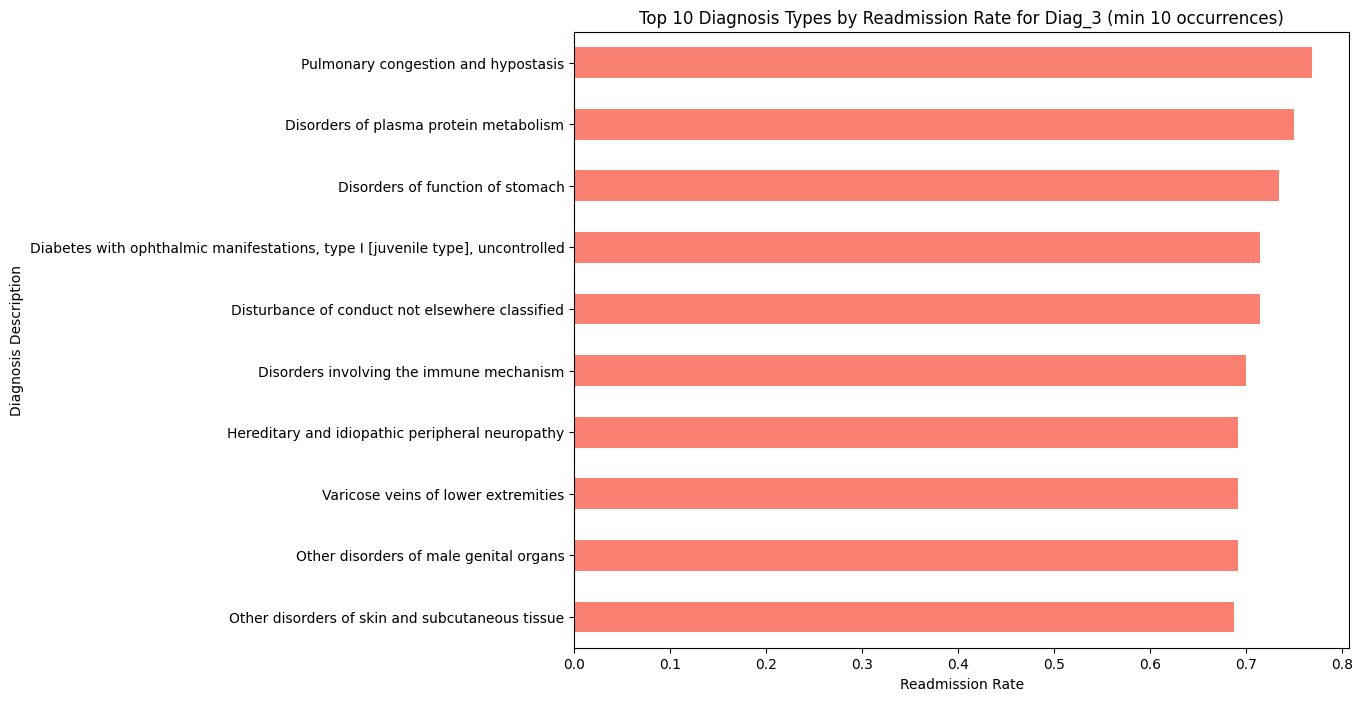

,mean,count
diag_3_desc,,
Pulmonary congestion and hypostasis,0.769231,13
Disorders of plasma protein metabolism,0.750000,12
Disorders of function of stomach,0.734082,267
"Diabetes with ophthalmic manifestations, type I [juvenile type], uncontrolled",0.714286,35
Disturbance of conduct not elsewhere classified,0.714286,14
Disorders involving the immune mechanism,0.700000,10
Hereditary and idiopathic peripheral neuropathy,0.692308,26
Varicose veins of lower extremities,0.692308,13
Other disorders of male genital organs,0.692308,13


In [33]:
# Filter diag_3 descriptions with at least 10 occurrences
diag_3_counts = diabetic_data['diag_3_desc'].value_counts()
filtered_diag_3_desc = diag_3_counts[diag_3_counts >= 10].index.tolist()
filtered_diag_3_data = diabetic_data[diabetic_data['diag_3_desc'].isin(filtered_diag_3_desc)]
readmit_rate_by_filtered_diag3 = filtered_diag_3_data.groupby('diag_3_desc')['readmitted'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)


# Plot for diag_3
plt.figure(figsize=(10, 8))
(readmit_rate_by_filtered_diag3.head(10)['mean']).plot(kind='barh', color='salmon')
plt.xlabel('Readmission Rate')
plt.ylabel('Diagnosis Description')
plt.title('Top 10 Diagnosis Types by Readmission Rate for Diag_3 (min 10 occurrences)')
plt.gca().invert_yaxis()
plt.show()

# Returning the tables for the top 10 diagnosis types after filtering for diag_3
top_10_filtered_diag3 = readmit_rate_by_filtered_diag3.head(10)

(top_10_filtered_diag3)

K-Means clustering


In [34]:
model_df['readmitted'] = model_df['readmitted'].astype(float)

#when i ran it sometimes readmitted would be an object? - so i changed it to this -
#model_df.loc[:,'readmitted'] = pd.to_numeric(model_df['readmitted'], errors='coerce')

#model_df.loc[:, 'readmitted'] = model_df['readmitted'].astype(float)
#model_df.dtypes

model_df["readmitted"].unique()

#model_df.dtypes


C:\Users\cassa\AppData\Local\Temp\ipykernel_9636\2912850884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['readmitted'] = model_df['readmitted'].astype(float)


array([0., 1.])

2 1188234.5641055228
3 1089993.1270866515
4 1007817.2287685906
5 959507.2785948296
6 901982.0799800016
7 847671.7806057923
8 821738.7916612879
9 799388.3214554407
10 779322.7754204234
11 759420.3023634444
12 717908.4543477218
13 707301.0259264536
14 672977.5512694947


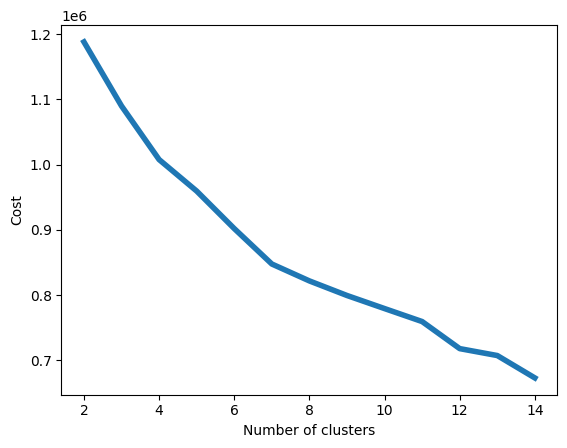

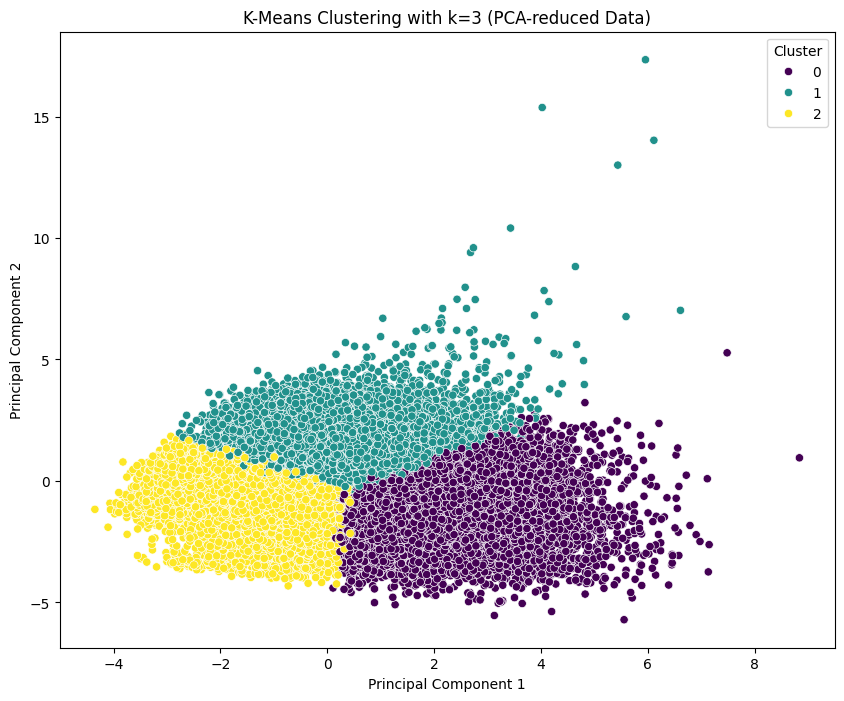

         time_in_hospital  num_medications
cluster                                   
0                8.089147        24.907908
1                3.424403        14.448588
2                3.231676        12.377790
Overall          4.395987        16.021844


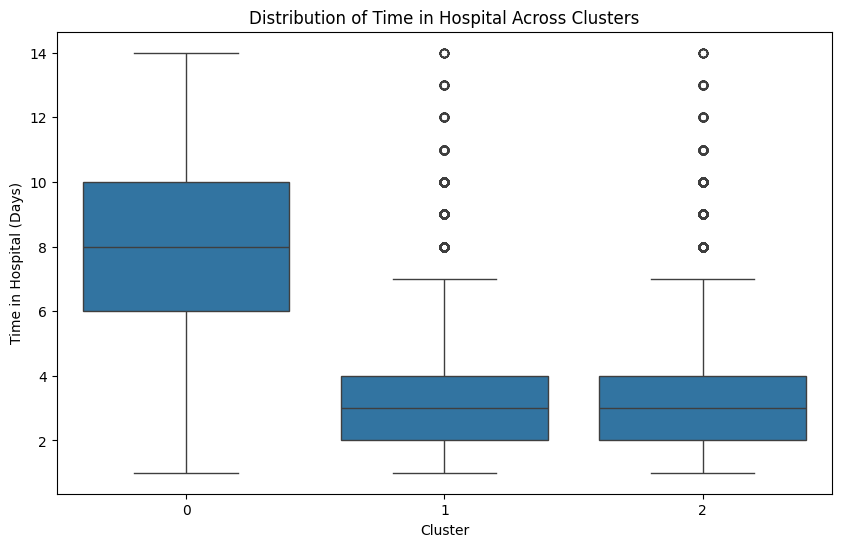

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA




data = pd.read_csv("diabetic_data.csv")

#Creating the function for elbow method
def elbow(data):
    sse = {}
    for k in range(2, 15, 1):
        kmeans = KMeans(n_clusters=k, max_iter=1000, n_init='auto').fit(data)
        print(k, kmeans.inertia_)
        sse[k] = kmeans.inertia_
    # Inertia: Sum of distances of samples to their closest cluster center
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()), linewidth=4)
    plt.xlabel("Number of clusters")
    plt.ylabel("Cost")
    plt.show()



# Replace '?' values with numpy.nan and drop columns with more than 50% missing values
data.replace('?', np.nan, inplace=True)
min_count = int(0.5 * data.shape[0])
data.dropna(axis=1, thresh=min_count, inplace=True)

# Drop columns with over 95% of values being the same
for column in data.columns:
    if data[column].value_counts(normalize=True).max() > 0.95:
        data.drop(column, axis=1, inplace=True)

# Select numerical columns for clustering
num_data = data.select_dtypes(include=[np.number])

# Normalize the numerical data
scaler = StandardScaler()
num_data_scaled = scaler.fit_transform(num_data)

# Using the elbow point
elbow(num_data_scaled)

# Apply K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(num_data_scaled)
labels = kmeans.labels_

# Add the cluster labels to the dataframe
num_data['cluster'] = labels

# Principal Component Analysis (PCA) for dimensionality reduction to 2D for visualization
pca = PCA(n_components=2)
num_data_pca = pca.fit_transform(num_data_scaled)
num_data['pca1'] = num_data_pca[:, 0]
num_data['pca2'] = num_data_pca[:, 1]

# Visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=num_data, palette='viridis')
plt.title('K-Means Clustering with k=3 (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Analyze cluster characteristics
feature_subset = ['time_in_hospital', 'num_medications']  # Example subset of features
cluster_means = num_data.groupby('cluster')[feature_subset].mean()
overall_means = num_data[feature_subset].mean()

comparison_df = cluster_means.copy()
comparison_df.loc['Overall'] = overall_means
print(comparison_df)

# Visualize the distribution of 'time_in_hospital' across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='time_in_hospital', data=num_data)
plt.title("Distribution of Time in Hospital Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Time in Hospital (Days)")
plt.show()

In [36]:

df_train, df_test = train_test_split(model_df, test_size=0.25)
print("Training size: {}, Testing size: {}".format(len(df_train), len(df_test)))
print("Samples: {} Features: {}".format(*df_train.shape))

Training size: 13899, Testing size: 4633
Samples: 13899 Features: 11


In [37]:
# df = model_df.select_dtypes(include=[np.number]).copy()
feature_cols = model_df.columns.values.tolist() #used this line because I need to keep all the columns (was having trouble with 'readmitted') 
feature_cols.remove('readmitted')
print("feature cols: ", feature_cols)
XO = model_df[feature_cols]
YO = model_df['readmitted']

scaler = StandardScaler()
scaled_XO = scaler.fit_transform(XO)


estimator = svm.SVR(kernel="linear")
selector = feature_selection.RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(scaled_XO, YO)
# From the ranking you can select your predictors with rank 1
# Model 1; let us select the folowing features as predictors:
select_features = np.array(feature_cols)[selector.ranking_ == 1].tolist()
print("selected features:", select_features)
#print("Feature rankings:", selector.ranking_)
#print("Support for each feature:", selector.support_)


feature cols:  ['num_medications', 'number_outpatient', 'number_emergency', 'time_in_hospital', 'number_inpatient', 'encounter_id', 'age', 'num_lab_procedures', 'number_diagnoses', 'num_procedures']
selected features: ['number_emergency', 'number_inpatient', 'num_procedures']


In [38]:
X = model_df[select_features]
Y = model_df['readmitted']
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.4)

In [39]:
lm = linear_model.LogisticRegression()
lm.fit(trainX, trainY)
# Inspect the calculated model equations
print("Y-axis intercept {:6.4f}".format(lm.intercept_[0]))
print("Weight coefficients:")
for feat, coef in zip(select_features, lm.coef_[0]):
 print(" {:>20}: {:6.4f}".format(feat, coef))
# The value of R^2
print("R squared for the training data is {:4.3f}".format(lm.score(trainX, trainY)))
print("Score against test data: {:4.3f}".format(lm.score(testX, testY)))

Y-axis intercept -0.6915
Weight coefficients:
     number_emergency: 0.3297
     number_inpatient: 0.4903
       num_procedures: 0.0018
R squared for the training data is 0.645
Score against test data: 0.637


In [40]:
scores = cross_val_score(linear_model.LogisticRegression(), 
X, Y, scoring="accuracy", cv=10) 
print("Accuracy score:\n {}".format(["{:.3f}".format(s) for s in scores])) 
print("Cross Validation Mean score: {}".format(scores.mean())) 


Accuracy score:
 ['0.652', '0.672', '0.638', '0.636', '0.637', '0.644', '0.634', '0.636', '0.627', '0.642']
Cross Validation Mean score: 0.64175263763651


In [41]:
predicted_probabilities = lm.predict_proba(testX)[:, 1]
print(predicted_probabilities)

[0.33370082 0.41053059 0.33370082 ... 0.4507473  0.33409626 0.33409626]


In [42]:
#confusion matrix with a threshold of 0.5
threshold = 0.5
predicted_labels = (predicted_probabilities >= threshold).astype(int)
cm = metrics.confusion_matrix(testY, predicted_labels)
print(cm)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)



[[4440  171]
 [2518  284]]
True Negatives (TN): 4440
False Positives (FP): 171
False Negatives (FN): 2518
True Positives (TP): 284


# Improved Model section


In [43]:
cleaned_data['race'] = cleaned_data['race'].replace(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'], ['1', '0', '0', '0', '0'])
cleaned_data['race'] = cleaned_data['race'].astype(int)
cleaned_data['race'].unique()

array([1, 0])

In [44]:
improve_df = cleaned_data[['num_medications', 'number_outpatient', 'number_emergency', 'time_in_hospital', 'number_inpatient', 'encounter_id', 'age', 'num_lab_procedures', 'number_diagnoses','num_procedures', 'readmitted', 'race']]
improve_df

,num_medications,number_outpatient,number_emergency,time_in_hospital,number_inpatient,encounter_id,age,num_lab_procedures,number_diagnoses,num_procedures,readmitted,race
20446,15.0,0.0,0.0,7.0,0.0,72091308,75.0,58.0,9.0,2,NO,1
20737,11.0,0.0,0.0,3.0,0.0,72848634,65.0,59.0,6.0,3,NO,1
20824,9.0,0.0,0.0,4.0,0.0,73062156,95.0,56.0,6.0,1,NO,1
21083,18.0,0.0,0.0,10.0,0.0,73731852,75.0,68.0,6.0,1,NO,1
23879,19.0,0.0,0.0,12.0,0.0,81355914,75.0,77.0,5.0,5,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...
101249,19.0,0.0,0.0,10.0,0.0,436785812,75.0,59.0,9.0,1,NO,1
101268,19.0,0.0,0.0,2.0,0.0,437270768,65.0,53.0,9.0,6,NO,1
101278,14.0,1.0,0.0,7.0,0.0,437309498,65.0,54.0,2.0,4,NO,1
101284,15.0,0.0,0.0,3.0,1.0,437331638,85.0,1.0,9.0,0,NO,1


In [45]:
# Investigating classification of re-admission. 3 options: ['<30', '>30', 'NO']
print(improve_df.groupby('readmitted').groups.keys())

dict_keys(['<30', '>30', 'NO'])


In [46]:
print(improve_df.isnull().sum())

num_medications       313
number_outpatient     356
number_emergency       46
time_in_hospital      150
number_inpatient       80
encounter_id            0
age                    84
num_lab_procedures     10
number_diagnoses       30
num_procedures          0
readmitted              0
race                    0
dtype: int64


In [47]:
improve_df = improve_df.dropna()
improve_df

,num_medications,number_outpatient,number_emergency,time_in_hospital,number_inpatient,encounter_id,age,num_lab_procedures,number_diagnoses,num_procedures,readmitted,race
20446,15.0,0.0,0.0,7.0,0.0,72091308,75.0,58.0,9.0,2,NO,1
20737,11.0,0.0,0.0,3.0,0.0,72848634,65.0,59.0,6.0,3,NO,1
20824,9.0,0.0,0.0,4.0,0.0,73062156,95.0,56.0,6.0,1,NO,1
21083,18.0,0.0,0.0,10.0,0.0,73731852,75.0,68.0,6.0,1,NO,1
23879,19.0,0.0,0.0,12.0,0.0,81355914,75.0,77.0,5.0,5,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...
101249,19.0,0.0,0.0,10.0,0.0,436785812,75.0,59.0,9.0,1,NO,1
101268,19.0,0.0,0.0,2.0,0.0,437270768,65.0,53.0,9.0,6,NO,1
101278,14.0,1.0,0.0,7.0,0.0,437309498,65.0,54.0,2.0,4,NO,1
101284,15.0,0.0,0.0,3.0,1.0,437331638,85.0,1.0,9.0,0,NO,1


In [48]:
# Convert re-admitted column into 1 if sucessful, 0 if not re-admitted.

improve_df['readmitted'] = improve_df['readmitted'].replace(['NO', '>30', '<30'], ['0', '1', '1'])
improve_df['readmitted'] = improve_df['readmitted'].astype(float)

improve_df["readmitted"].unique()


C:\Users\cassa\AppData\Local\Temp\ipykernel_9636\1606247083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  improve_df['readmitted'] = improve_df['readmitted'].replace(['NO', '>30', '<30'], ['0', '1', '1'])
C:\Users\cassa\AppData\Local\Temp\ipykernel_9636\1606247083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  improve_df['readmitted'] = improve_df['readmitted'].astype(float)


array([0., 1.])

In [49]:
# df = model_df.select_dtypes(include=[np.number]).copy()
feature_cols2 = improve_df.columns.values.tolist() #used this line because I need to keep all the columns (was having trouble with 'readmitted') 
feature_cols2.remove('readmitted')
print("feature cols: ", feature_cols2)
XO2 = improve_df[feature_cols2]
YO2 = improve_df['readmitted']

scaler2 = StandardScaler()
scaled_XO2 = scaler2.fit_transform(XO2)


estimator2 = svm.SVR(kernel="linear")
selector2 = feature_selection.RFE(estimator2, n_features_to_select=3, step=1)
selector2 = selector2.fit(scaled_XO2, YO2)
# From the ranking you can select your predictors with rank 1
# Model 1; let us select the folowing features as predictors:
select_features2 = np.array(feature_cols2)[selector2.ranking_ == 1].tolist()
print("selected features:", select_features2)
#print("Feature rankings:", selector.ranking_)
#print("Support for each feature:", selector.support_)

feature cols:  ['num_medications', 'number_outpatient', 'number_emergency', 'time_in_hospital', 'number_inpatient', 'encounter_id', 'age', 'num_lab_procedures', 'number_diagnoses', 'num_procedures', 'race']


selected features: ['number_emergency', 'number_inpatient', 'race']


In [55]:
X2 = improve_df[select_features2]
Y2 = improve_df['readmitted']
trainX2, testX2, trainY2, testY2 = train_test_split(X2, Y2, test_size=0.3)

In [56]:
lm2 = linear_model.LogisticRegression()
lm2.fit(trainX2, trainY2)
# Inspect the calculated model equations
print("Y-axis intercept {:6.4f}".format(lm2.intercept_[0]))
print("Weight coefficients:")
for feat, coef in zip(select_features2, lm2.coef_[0]):
 print(" {:>20}: {:6.4f}".format(feat, coef))
# The value of R^2
print("R squared for the training data is {:4.3f}".format(lm2.score(trainX2, trainY2)))
print("Score against test data: {:4.3f}".format(lm2.score(testX2, testY2)))

Y-axis intercept -0.8653
Weight coefficients:
     number_emergency: 0.3681
     number_inpatient: 0.4679
                 race: 0.2597
R squared for the training data is 0.640
Score against test data: 0.645


In [57]:
crf = RandomForestClassifier(n_jobs=-1, n_estimators=200, min_samples_leaf=4, \
                             max_depth = 90, oob_score=True)
crf.fit(trainX2,trainY2)

print("Accuracy score for training data is: {:4.3f}".format(crf.score(trainX2, trainY2)))
print("Accuracy score for test data: {:4.3f}".format(crf.score(testX2, testY2)))
print("The Oob score is: {:4.3f}".format(crf.oob_score_))

Accuracy score for training data is: 0.641
Accuracy score for test data: 0.647
The Oob score is: 0.628


In [58]:
xgb = XGBClassifier(
    n_estimators=840,  
    learning_rate=0.005,  
    max_depth=8, 
    min_child_weight=2,  
    gamma=0.01, 
    subsample=0.5,  
    colsample_bytree=0.5,  
    #used L1 and L2 regularisation 
    reg_alpha=0.001, 
    reg_lambda=0.1,  
    random_state=42
)



xgb.fit(trainX2, trainY2)
y_pred = xgb.predict(testX2)
accuracy = accuracy_score(testY2, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.64568345323741


In [59]:
voting_class = VotingClassifier(
    estimators=[('lr', lm2), ('rf', crf), ('xgb', xgb)],
    voting='hard'  
)

voting_class.fit(trainX2, trainY2)

y_pred = voting_class.predict(testX2)

accuracy = accuracy_score(testY2, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6471223021582734
